In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
#Test set Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [4]:
#Loading Model

In [5]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [6]:
import os

file_path = "trained_plant_disease_model.keras"
if not os.path.isfile(file_path):
    print(f"File not found: {file_path}")


In [ ]:
#Visualising and Performing Prediction on Single image

In [ ]:
!pip install opencv-python

In [ ]:
pip install opencv-python matplotlib


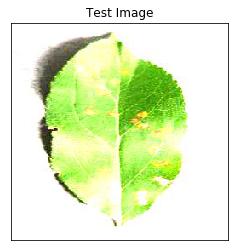

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

# Open an image file
image_path = 'test/test/AppleCedarRust1.JPG'
img = Image.open(image_path)

# Display the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()



In [ ]:
#Testing Model

In [8]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 125ms/step


In [9]:
print(predictions)

[[3.5907756e-11 4.7897823e-14 1.0000000e+00 6.9379506e-14 3.7072770e-10
  1.0560037e-10 6.6089126e-13 1.5273964e-12 1.0537148e-16 4.8292160e-15
  3.4242945e-16 2.7801671e-14 6.8863592e-15 4.1726590e-17 5.4214429e-13
  5.4974705e-12 2.9579744e-12 2.3125422e-13 1.1703690e-13 2.4512206e-10
  3.8604374e-15 1.2763137e-16 4.7436109e-12 1.6681956e-13 1.6861334e-15
  6.0077184e-15 4.7433703e-14 1.2462256e-15 6.1988970e-11 4.1092225e-13
  4.4211332e-09 9.9180077e-14 4.7280920e-12 1.0482028e-15 2.3741985e-12
  2.0606845e-14 8.2614288e-14 2.2976414e-10]]


In [10]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


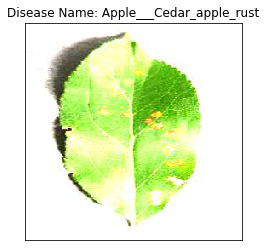

In [11]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()